# Data clustering

In this notebook, we perform an exploratory statistical analysis of the neural recording data. We use Principal Component Analysis and K-means clustering for reduce the dimensionality of the dataset and find underlying data patterns.

In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
import seaborn as sns
sns.set(palette='muted')
from sklearn.feature_selection import VarianceThreshold

In [2]:
f = h5py.File('JH107_dataframe.mat','r')

In [3]:
df = pd.DataFrame(data=np.array(f.get('short')).T)
df.columns= ['trialNumber','StimDuration','StimAmp','StimFreq','Association','Stim/NoStim','Light/NoLight','Lick','Perf',
             'ReactionTime','ITI','QuietWindow','TrialTime','Cue/NoCue','Reward/NoReward','EarlyLick','MeanDopamine',
             'StdDopamine','MaxDopamine','MinDopamine','NumberLicks','MaxLick','FirstLick','LastLick','TrialType']
df.index=df.trialNumber.astype(int)-1
trialType = df.TrialType
simple = df[['Stim/NoStim','Reward/NoReward','Lick','EarlyLick','TrialType']]
df = df.drop(columns=['trialNumber'])
df_try = df.drop(columns=['TrialType','Stim/NoStim','Reward/NoReward','Lick','EarlyLick'])

In [4]:
df

,StimDuration,StimAmp,StimFreq,Association,Stim/NoStim,Light/NoLight,Lick,Perf,ReactionTime,ITI,...,EarlyLick,MeanDopamine,StdDopamine,MaxDopamine,MinDopamine,NumberLicks,MaxLick,FirstLick,LastLick,TrialType
trialNumber,,,,,,,,,,,,,,,,,,,,,
0,40.0,3.0,25.0,0.0,0.0,0.0,0.0,2.0,0.0,9227.5,...,0.0,0.001707,0.002922,0.011621,-0.005271,0.0,0.000000,0.0,0.0,5.0
1,40.0,3.0,25.0,0.0,0.0,0.0,0.0,2.0,0.0,8832.2,...,0.0,0.001342,0.002848,0.009997,-0.005723,0.0,0.000000,0.0,0.0,5.0
2,40.0,3.0,25.0,0.0,1.0,0.0,1.0,5.0,400.0,10201.1,...,1.0,0.002314,0.003130,0.013496,-0.007962,8.0,0.066337,773.0,1845.0,0.0
3,40.0,3.0,25.0,0.0,1.0,0.0,0.0,0.0,400.0,10201.1,...,0.0,0.002667,0.002951,0.012070,-0.007407,0.0,0.000000,0.0,0.0,4.0
4,40.0,3.0,25.0,0.0,0.0,0.0,1.0,5.0,399.0,8521.0,...,1.0,0.002059,0.002933,0.011819,-0.005560,1.0,0.023064,1100.0,1100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,40.0,3.0,25.0,0.0,0.0,0.0,0.0,2.0,0.0,9557.3,...,0.0,0.001604,0.003061,0.010415,-0.006669,0.0,0.000000,0.0,0.0,5.0
409,40.0,3.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,12552.4,...,0.0,0.001508,0.003068,0.010741,-0.009026,0.0,0.000000,0.0,0.0,4.0
410,40.0,3.0,25.0,0.0,0.0,0.0,0.0,2.0,0.0,10894.9,...,0.0,0.001738,0.003447,0.016161,-0.007453,0.0,0.000000,0.0,0.0,5.0


In [5]:
number_trials = df['StimDuration'].count()
colors = ['orange','blue','dodgerblue','gold','midnightblue','chocolate']

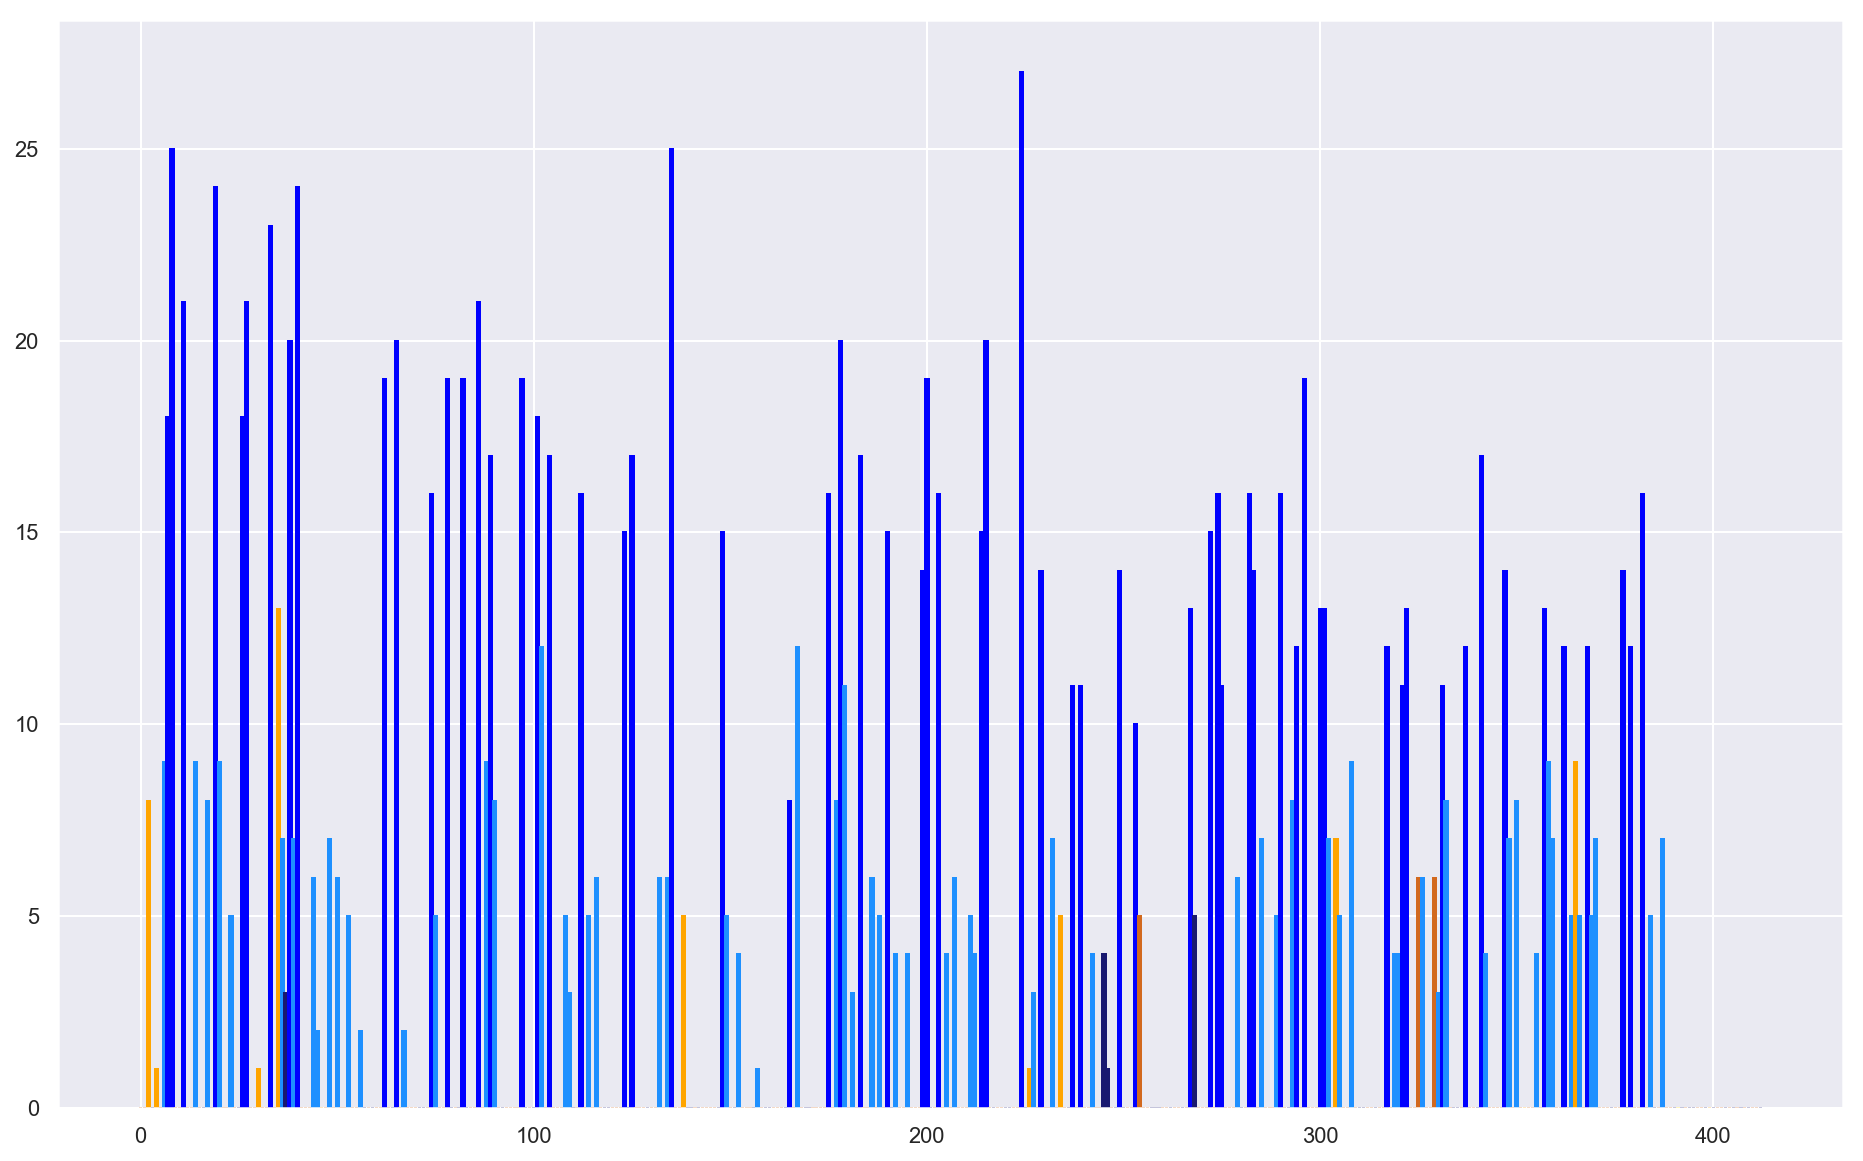

In [6]:
fig,ax = plt.subplots(figsize=(16,10))
a = ax.bar(df.index,df.NumberLicks)
for trial in list(range(number_trials)):
    color_type = colors[int(df.TrialType[trial])]
    a[trial].set_color(color_type)

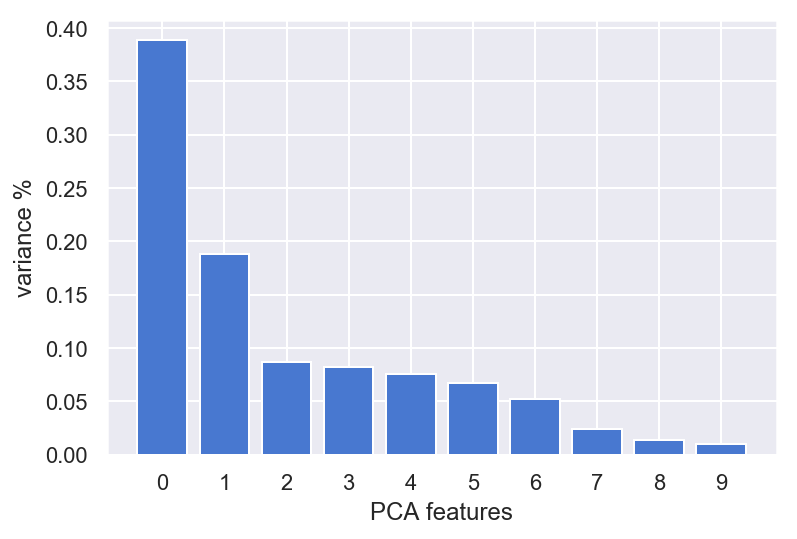

In [7]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df_try)

# Create a PCA instance: pca
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents,columns=['PC'+str(i) for i in range(10)])

In [8]:
X_std = StandardScaler().fit_transform(df)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
pri = sel.fit_transform(X_std)
principal = pd.DataFrame(pri)
principal.columns = ['Stim/NoStim','Lick','Perf','ReactionTime','ITI','QuietWindow','TrialTime','Reward/NoReward','EarlyLick',
                     'MeanDopamine','StdDopamine','MaxDopamine','MinDopamine','NumberLicks','MaxLick','FirstLick','LastLick','TrialType']


In [9]:
principal

,Stim/NoStim,Lick,Perf,ReactionTime,ITI,QuietWindow,TrialTime,Reward/NoReward,EarlyLick,MeanDopamine,StdDopamine,MaxDopamine,MinDopamine,NumberLicks,MaxLick,FirstLick,LastLick,TrialType
0,-1.002424,-0.727757,0.582394,-0.730285,-0.861711,-1.050305,-1.714863,-0.539096,-0.172989,0.706390,-1.127934,0.204104,1.707448,-0.593751,-0.661085,-0.687079,-0.697758,0.846436
1,-1.002424,-0.727757,0.582394,-0.730285,-1.134668,0.474589,-1.706991,-0.539096,-0.172989,0.548027,-1.370728,-0.289359,1.529348,-0.593751,-0.661085,-0.687079,-0.697758,0.846436
2,0.997582,1.374086,3.679333,0.041327,-0.189433,1.247030,-1.698334,-0.539096,5.780715,0.969402,-0.443819,0.773590,0.647632,0.704564,1.007265,-0.155531,0.122444,-2.136311
3,0.997582,-0.727757,-1.482231,0.041327,-0.189433,1.247030,-1.695285,-0.539096,-0.172989,1.122563,-1.031601,0.340543,0.866060,-0.593751,-0.661085,-0.687079,-0.697758,0.249886
4,-1.002424,1.374086,3.679333,0.039398,-1.349554,1.077635,-1.687582,-0.539096,5.780715,0.858738,-1.090076,0.264062,1.593316,-0.431462,-0.081033,0.069329,-0.208749,-2.136311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,-1.002424,-0.727757,0.582394,-0.730285,-0.633982,-0.023094,1.681956,-0.539096,-0.172989,0.661766,-0.669536,-0.162613,1.156599,-0.593751,-0.661085,-0.687079,-0.697758,0.846436
409,0.997582,-0.727757,-1.482231,-0.730285,1.434156,-0.193166,1.691956,-0.539096,-0.172989,0.620164,-0.646416,-0.063347,0.228474,-0.593751,-0.661085,-0.687079,-0.697758,0.249886
410,-1.002424,-0.727757,0.582394,-0.730285,0.289640,1.393049,1.701011,-0.539096,-0.172989,0.719888,0.600869,1.583550,0.847804,-0.593751,-0.661085,-0.687079,-0.697758,0.846436
411,-1.002424,-0.727757,0.582394,-0.730285,-0.836714,1.218233,1.709145,-0.539096,-0.172989,0.320783,-0.050670,0.254832,-0.102172,-0.593751,-0.661085,-0.687079,-0.697758,0.846436


Text(0, 0.5, 'PCA 1')

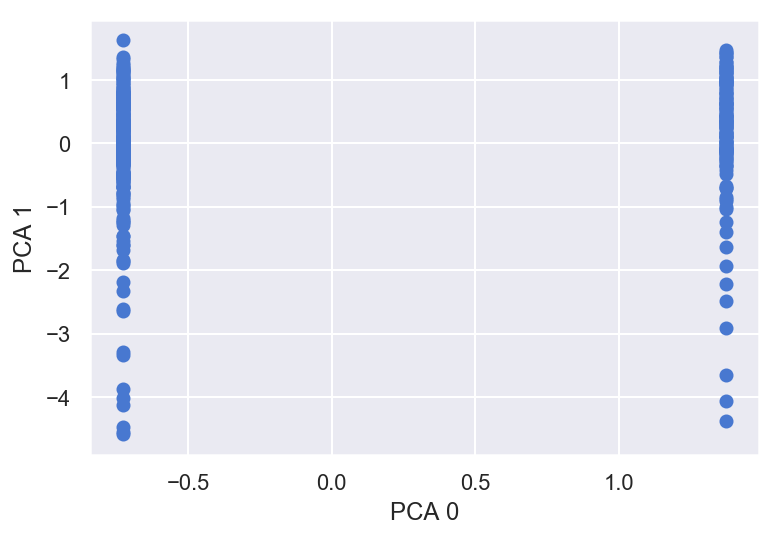

In [10]:
plt.scatter(principal.Lick, principal.MeanDopamine)
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')

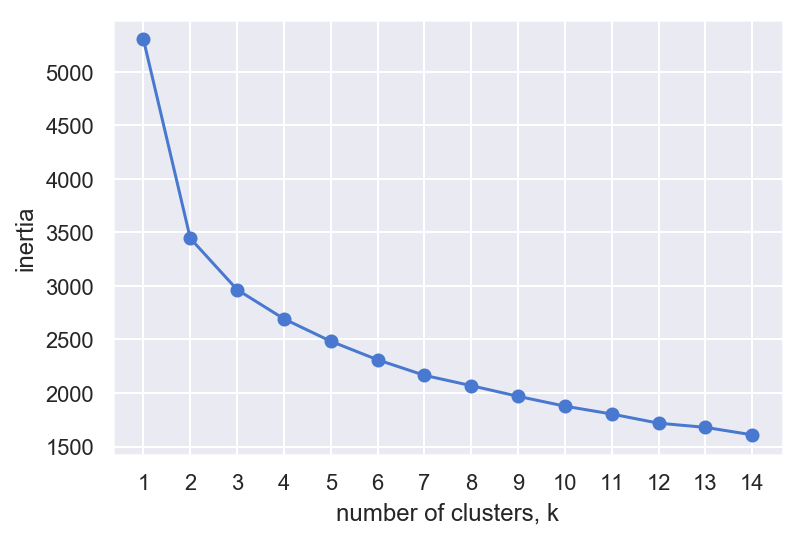

In [11]:
PCA_df = PCA_components.iloc[:,:]
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [12]:
model = KMeans(n_clusters=6)
PCA_df['Cluster']=model.fit_predict(PCA_df)
PCA_df = PCA_df.join(trialType.astype(int))

In [14]:
import chart_studio
chart_studio.tools.set_credentials_file(username='emfernan',api_key='lOBpMzVEocCSSDvJ651v')

In [15]:
import plotly.express as px  # (version 4.7.0)
import plotly.io as pio
import plotly.graph_objects as go
import chart_studio.plotly as py

fig = px.scatter_3d(
    data_frame=PCA_df,
    x='PC0',
    y='PC1',
    z='PC2',
    color="TrialType",
    color_discrete_sequence=['magenta','green','black','yellow','red'],
    # color_discrete_map={'Europe': 'black', 'Africa': 'yellow'},
    # opacity=0.3,              # opacity values range from 0 to 1
    # symbol='Year',            # symbol used for bubble
    # symbol_map={"2005": "square-open", "2010": 3},
    # size='resized_pop',       # size of bubble
    # size_max=50,              # set the maximum mark size when using size
    #log_x=True,  # you can also set log_y and log_z as a log scale
    # range_z=[9,13],           # you can also set range of range_y and range_x
    template='seaborn',         # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                # 'plotly_white', 'plotly_dark', 'presentation',
                                # 'xgridoff', 'ygridoff', 'gridon', 'none'
    title='Kmeans Clusters with PCA dimensionality reduction',
    #labels={'Years in school (avg)': 'Years Women are in School'},
    # hover_data={'Continent': False, 'GDP per capita': ':.1f'},
    hover_name='Cluster',        # values appear in bold in the hover tooltip
    height=700,                 # height of graph in pixels
    # animation_frame='Year',   # assign marks to animation frames
    # range_x=[500,100000],
    # range_z=[0,14],
    # range_y=[5,100]

)

In [16]:
py.plot(fig, filename = 'basic-trialType-graph', auto_open=True)

'https://plotly.com/~emfernan/3/'